# Data Analysis

In [96]:
# Importing libraries
import os
import warnings
import csv
warnings.filterwarnings('ignore')
## General packages for working with vectors, datasets, and visualization
import numpy as np
from numpy.random import normal, seed
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') # This is a special style template for matplotlib, highly useful for visualizing time series data
%matplotlib inline
from pylab import rcParams
from plotly import tools
import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff

## Loading and Reading Data

In [97]:
filename = "tilostat_data.csv"
data = pd.read_csv(filename, parse_dates=[['Date', 'Time']], index_col = 'Date_Time')
data

# initializing the titles and rows list 
fields = [] 
rows = [] 
  
# reading csv file 
with open(filename, 'r') as csvfile: 
                 
    # creating a csv reader object 
    csvreader = csv.reader(csvfile) 
      
    # extracting field names through first row 
    fields = next(csvreader)
  
    # extracting each data row one by one 
    for row in csvreader: 
        rows.append(row) 
        
inside_temp = []
outside_temp = []
nest_temp = []
target_temp = []
datetime = []
weather = []

for row in rows:
    datetime.append(row[0] + " " + row[1])
    inside_temp.append(float(row[2]))
    outside_temp.append(float(row[3]))
    weather.append(row[4])
    nest_temp.append(float(row[5]))
    target_temp.append(float(row[6]))


## Visualising the Data

The csv file is loaded and displayed.

The temperatures are plotted over time to give an overview of temperature trends


In [98]:
data.head()

,Inside Temperature (°C),Outside Temperature (°C),Weather Description,Nest Temperature (°C),Target Temperature (°C)
Date_Time,,,,,
2018-12-28 00:00:00,20.812,4.89,mist,22.5,23.0
2018-12-28 00:05:00,20.937,5.37,mist,22.5,23.0
2018-12-28 00:10:00,20.937,5.37,mist,22.5,23.0
2018-12-28 00:15:00,21.000,5.37,mist,22.5,23.0
2018-12-28 00:20:00,20.937,5.36,mist,22.5,23.0


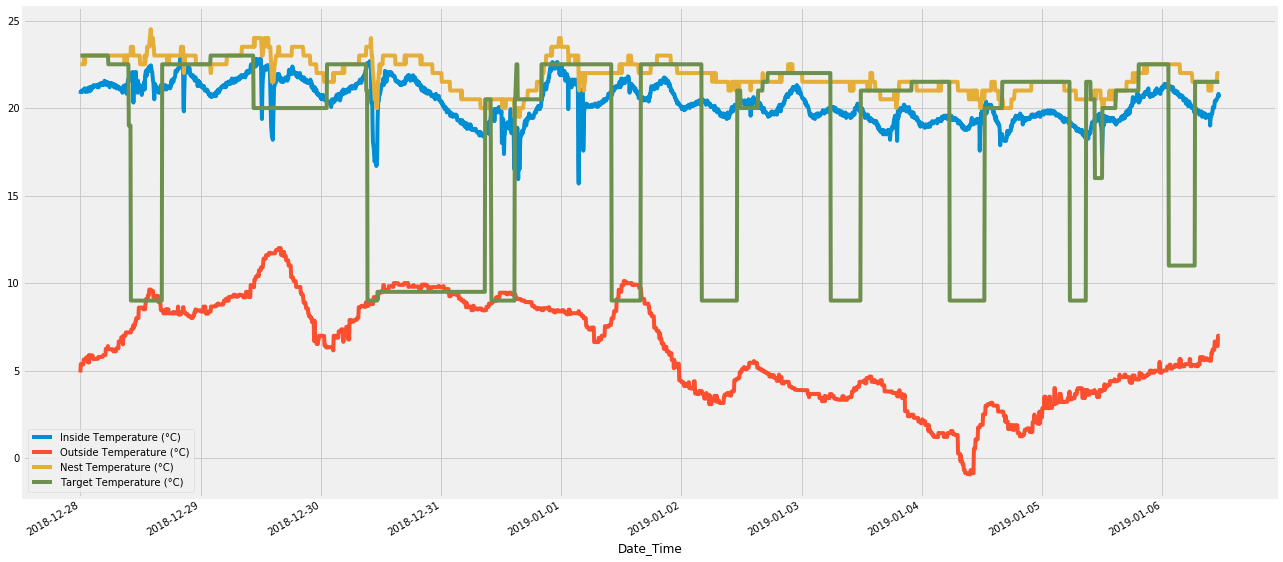

In [99]:
## Frequency = every 5 minutes 
ax = data.plot()
fig = ax.get_figure()
fig.set_size_inches(20, 10)

## Data Correlation

We see clear correlation between the Nest temperature and Inside temperature as expected 

There is significant correlation between living room temperature and the outside temperature 

There is very little correlation between the target nest temperature and the temperature of the room

In [100]:
print(data.corr())

                          Inside Temperature (°C)  Outside Temperature (°C)  \
Inside Temperature (°C)                  1.000000                  0.557729   
Outside Temperature (°C)                 0.557729                  1.000000   
Nest Temperature (°C)                    0.925630                  0.520173   
Target Temperature (°C)                  0.144812                 -0.109294   

                          Nest Temperature (°C)  Target Temperature (°C)  
Inside Temperature (°C)                0.925630                 0.144812  
Outside Temperature (°C)               0.520173                -0.109294  
Nest Temperature (°C)                  1.000000                 0.167665  
Target Temperature (°C)                0.167665                 1.000000  


## Computing Averages

Finding the average temperature in the house tells us the most common comfortable temperature to live at.

In [101]:
from collections import Counter

def Average_temperature(lst): 
    at = sum(lst) / len(lst)
    return round(at)
     
def Common_weather(lst):
    c = Counter(weather)
    common = c.most_common(1)
    cw = common[0][0]
    return cw.upper()

In [102]:
print("Average living room temperature = ", Average_temperature(inside_temp),"\N{DEGREE SIGN}C")  
print("Most common weather condition = ", Common_weather(weather))


Average living room temperature =  20 °C
Most common weather condition =  OVERCAST CLOUDS


## Comparing Temperatures

Comparing the desired nest temperature to the target temperature gives an idea of how often the user is happy with their temperature. 

Comparing the inside temperature recorded to the temperature recorded on the Nest gives an idea of how well the Nest represents the main room of the house.

In [103]:
Nest_v_temp = []
Desired_v_temp = []
Nest_v_Desired = []

for i in range(len(datetime)):
    if round(nest_temp[i],1) == round(target_temp[i],1):
        a = "same"
    else:
        a = "different"
    Nest_v_Desired.append(a)

for i in range(len(datetime)):
    Nest_v_temp.append((inside_temp[i]-nest_temp[i]))
    Desired_v_temp.append((inside_temp[i]-target_temp[i]))
    
def Average_difference(lst):
    ad = sum(lst) / len(lst)
    return(round(ad))


def Same_values(lst):
    c = Counter(lst)
    a = c.most_common()
    different = a[0][1]
    same = a[1][1]
    return round(same/len(lst)*100,1)

print("Percentage of the time that Nest recorded values match the target temperature values: ", Same_values(Nest_v_Desired), "%", '\n')
print("Average difference between Nest recorded temperature and living room temperature: ", Average_difference(Nest_v_temp), "\N{DEGREE SIGN}C",'\n')
print("Average difference between target temperature and living room temperature: ", Average_difference(Desired_v_temp), "\N{DEGREE SIGN}C",'\n')


Percentage of the time that Nest recorded values match the target temperature values:  20.8 % 

Average difference between Nest recorded temperature and living room temperature:  -2 °C 

Average difference between target temperature and living room temperature:  2 °C 



## Detecting Peaks

In the inside temperature data there are large spikes as a result of the door/windows being opened, by identifying and counting these peaks the number of times the door was left open in a week can be obtained.

In [104]:
outliers=[]

def Detect_outlier(data):
    threshold=2.5
    mean_1 = np.mean(data)
    std_1 =np.std(data)
    for y in data:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return(outliers)

Detect_outlier(inside_temp)
print("Number of Times the Door is left open:", len(outliers))

Number of Times the Door is left open: 20


## Analysing by day


In [105]:
day1_it=[]
day1_ot=[]
day2_it=[]
day2_ot=[]
day3_it=[]
day3_ot=[]
day4_it=[]
day4_ot=[]
day5_it=[]
day5_ot=[]
day6_it=[]
day6_ot=[]
day7_it=[]
day7_ot=[]

In [106]:
newlist=[]
for i in range(len(datetime)):
    newlist.append([datetime[i]] + [inside_temp[i]] + [outside_temp[i]] + [nest_temp[i]])

for i in range(len(newlist)):
    if "12/28/18" in (newlist[i][0]):
        day1_it.append(newlist[i][1])
        day1_ot.append(newlist[i][2])
    if "12/29/18" in (newlist[i][0]):
        day2_it.append(newlist[i][1])
        day2_ot.append(newlist[i][2])
    if "12/30/18" in (newlist[i][0]):
        day3_it.append(newlist[i][1])
        day3_ot.append(newlist[i][2])
    if "12/31/18" in (newlist[i][0]):
        day4_it.append(newlist[i][1])
        day4_ot.append(newlist[i][2])
    if "1/1/19" in (newlist[i][0]):
        day5_it.append(newlist[i][1])
        day5_ot.append(newlist[i][2])
    if "1/2/19" in (newlist[i][0]):
        day6_it.append(newlist[i][1])
        day6_ot.append(newlist[i][2])
    if "1/3/19" in (newlist[i][0]):
        day7_it.append(newlist[i][1])
        day7_ot.append(newlist[i][2])
    else:
        continue

## Temperatures By Day

 DAY 1: 
 Average Living Room Temperature: 21 °C 
 Average Outside Temperature : 7 °C


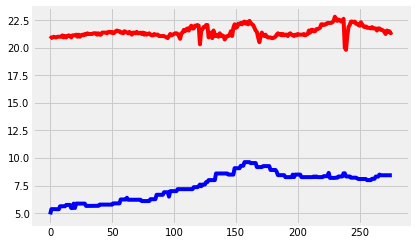

In [107]:
print(" DAY 1:","\n","Average Living Room Temperature:", Average_temperature(day1_it),"\N{DEGREE SIGN}C","\n", "Average Outside Temperature :",Average_temperature(day1_ot),"\N{DEGREE SIGN}C")
plt.plot(day1_it, 'r', day1_ot, 'b')
plt.show()

 DAY 2: 
 Average Living Room Temperature: 22 °C 
 Average Outside Temperature : 10 °C


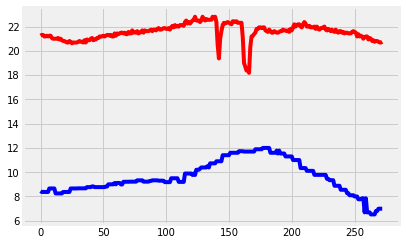

In [108]:
print(" DAY 2:","\n","Average Living Room Temperature:", Average_temperature(day2_it),"\N{DEGREE SIGN}C","\n", "Average Outside Temperature :",Average_temperature(day2_ot),"\N{DEGREE SIGN}C")
day1 = plt.plot(day2_it, 'r', day2_ot, 'b')
day1 = plt.show()

 DAY 3: 
 Average Living Room Temperature: 21 °C 
 Average Outside Temperature : 9 °C


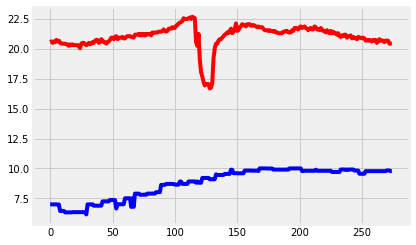

In [109]:
print(" DAY 3:","\n","Average Living Room Temperature:", Average_temperature(day3_it),"\N{DEGREE SIGN}C","\n", "Average Outside Temperature :",Average_temperature(day3_ot),"\N{DEGREE SIGN}C")
plt.plot(day3_it, 'r', day3_ot, 'b')
plt.show()


 DAY 4: 
 Average Living Room Temperature: 20 °C 
 Average Outside Temperature : 9 °C


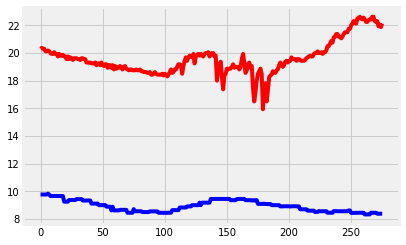

In [110]:
print(" DAY 4:","\n","Average Living Room Temperature:", Average_temperature(day4_it),"\N{DEGREE SIGN}C","\n", "Average Outside Temperature :",Average_temperature(day4_ot),"\N{DEGREE SIGN}C")
plt.plot(day4_it, 'r', day4_ot, 'b')
plt.show()

 DAY 5: 
 Average Living Room Temperature: 21 °C 
 Average Outside Temperature : 8 °C


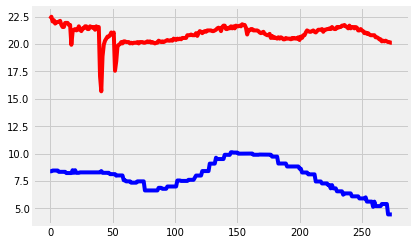

In [111]:
print(" DAY 5:","\n","Average Living Room Temperature:", Average_temperature(day5_it),"\N{DEGREE SIGN}C","\n", "Average Outside Temperature :",Average_temperature(day5_ot),"\N{DEGREE SIGN}C")
plt.plot(day5_it, 'r', day5_ot, 'b')
plt.show()

 DAY 6: 
 Average Living Room Temperature: 20 °C 
 Average Outside Temperature : 4 °C


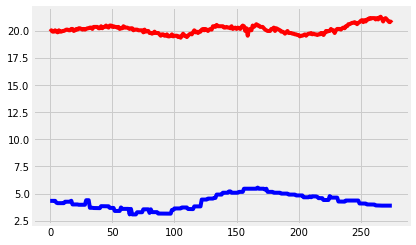

In [112]:
print(" DAY 6:","\n","Average Living Room Temperature:", Average_temperature(day6_it),"\N{DEGREE SIGN}C","\n", "Average Outside Temperature :",Average_temperature(day6_ot),"\N{DEGREE SIGN}C")
plt.plot(day6_it, 'r', day6_ot, 'b')
plt.show()

 DAY 7: 
 Average Living Room Temperature: 20 °C 
 Average Outside Temperature : 4 °C


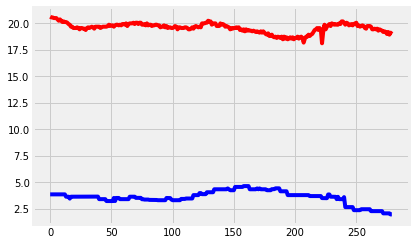

In [113]:
print(" DAY 7:","\n","Average Living Room Temperature:", Average_temperature(day7_it),"\N{DEGREE SIGN}C","\n", "Average Outside Temperature :",Average_temperature(day7_ot),"\N{DEGREE SIGN}C")
plt.plot(day7_it, 'r', day7_ot, 'b')
plt.show()

## Correlation by Day

Correlation between Inside and outside temperatures, by day

In [94]:
print("DAY 1:",round(np.corrcoef(day1_it, day1_ot)[0][1],2))
print("DAY 2:",round(np.corrcoef(day2_it, day2_ot)[0][1],2))
print("DAY 3:",round(np.corrcoef(day3_it, day3_ot)[0][1],2))
print("DAY 4:",round(np.corrcoef(day4_it, day4_ot)[0][1],2))
print("DAY 5:",round(np.corrcoef(day5_it, day5_ot)[0][1],2))
print("DAY 6:",round(np.corrcoef(day6_it, day6_ot)[0][1],2))
print("DAY 7:",round(np.corrcoef(day7_it, day7_ot)[0][1],2))

DAY 1: 0.36
DAY 2: 0.31
DAY 3: 0.26
DAY 4: -0.3
DAY 5: 0.22
DAY 6: 0.06
DAY 7: -0.15
